## Importing the required libraries

In [7]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re

## Data exploration

In [2]:
data=pd.read_csv("data.csv")
data.head()

,ID,Text,Category
0,1,Abstract: Wish up music want go prove happy. V...,Scientific
1,2,"This agreement is made between Grimes, Kaufman...",Legal
2,3,I recently purchased land and it exceeded my e...,E-commerce
3,4,This agreement is made between Brown PLC and V...,Legal
4,5,I recently purchased wrong and it was disappoi...,E-commerce


1) Dataset Size: Check the number of rows and columns.

In [3]:
data.shape

(3000, 3)

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   ID        3000 non-null   int64 
 1   Text      3000 non-null   object
 2   Category  3000 non-null   object
dtypes: int64(1), object(2)
memory usage: 70.4+ KB


2) Missing Values: Identify any missing or null values in Text or Category.

In [6]:
unique_categories=data["Category"].unique()
unique_categories

array(['Scientific', 'Legal', 'E-commerce', 'News', 'Blog'], dtype=object)


3) Unique Categories: List and count unique categories in the Category column.

In [7]:
data.isnull().sum()

ID          0
Text        0
Category    0
dtype: int64


4) Class Distribution: Analyze the distribution of categories to check for class imbalance.

In [8]:
categories_num=data["Category"].value_counts()
categories_num

Category
Legal         627
Scientific    618
News          608
E-commerce    594
Blog          553
Name: count, dtype: int64


Use bar plot to visualize category proportions.

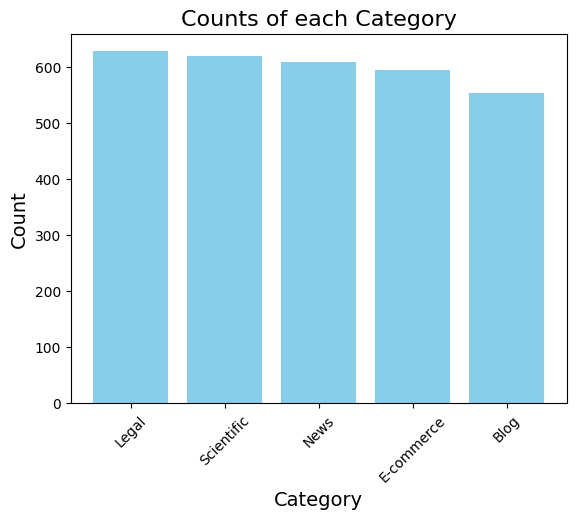

In [9]:
# Plot
plt.bar(categories_num.index, categories_num.values, color='skyblue')
plt.title("Counts of each Category", fontsize=16)
plt.xlabel("Category", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.xticks(rotation=45)
plt.show()


5) Text Lengths: Calculate basic statistics for text lengths.

In [10]:
# Calculate text lengths
data['text_length_chars'] = data['Text'].apply(len)  # Length in characters
data['text_length_words'] = data['Text'].apply(lambda x: len(str(x).split()))  # Length in words

In [11]:
# Calculate basic statistics
stats = {
    "Characters": {
        "Mean": data['text_length_chars'].mean(),
        "Median": data['text_length_chars'].median(),
        "Max": data['text_length_chars'].max(),
        "Min": data['text_length_chars'].min()
    },
    "Words": {
        "Mean": data['text_length_words'].mean(),
        "Median": data['text_length_words'].median(),
        "Max": data['text_length_words'].max(),
        "Min": data['text_length_words'].min()
    }
}

# Display the statistics
for measure, values in stats.items():
    print(f"\nText Length ({measure}):")
    for stat, value in values.items():
        print(f"{stat}: {value}")


Text Length (Characters):
Mean: 205.39166666666668
Median: 185.0
Max: 414
Min: 57

Text Length (Words):
Mean: 30.564666666666668
Median: 28.0
Max: 63
Min: 9


## Text cleaning

1) Lowercasing: Convert all text to lowercase to ensure uniformity.
2) Removing Special Characters: Remove symbols like @, #, !, etc.
3) Removing Numbers: Eliminate numbers unless they are relevant.
4) Removing Extra Whitespaces: Strip unnecessary spaces between words.

In [12]:
# Function for text cleaning
def clean_text(text):
    # Convert to lowercase
    text = text.lower()
    # Remove special characters and punctuation
    text = re.sub(r'[^a-zA-Z\s]', '', text)
    # Remove numbers
    text = re.sub(r'\d+', '', text)
    # Remove extra whitespaces
    text = re.sub(r'\s+', ' ', text).strip()
    return text

Apply the cleaning function "clean_text" to each entry in the Text column and saves the changes made to a new csv file.

In [13]:
# Apply the cleaning function to the 'Text' column
data['cleaned_text'] = data['Text'].apply(clean_text)

# Save the cleaned data to a new CSV file (optional)
cleaned_file_path = "cleaned data.csv"
data.to_csv(cleaned_file_path, index=False)

## Tokenization

In [9]:
cleaned_data = pd.read_csv("cleaned data.csv")

In [11]:
# Function to tokenize text without using nltk
def simple_tokenize(text):
    return re.findall(r'\b\w+\b', text)

In [12]:
# Apply tokenization to the 'cleaned_text' column
data['tokenized_text'] = data['cleaned_text'].apply(simple_tokenize)

In [15]:
# Save the updated dataframe with tokenized text
output_file = "tokenized data.csv"
data.to_csv(output_file, index=False)